In [1]:
pip install imageio numpy matplotlib

<ipython-input-2-1ad88d6a9010>:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


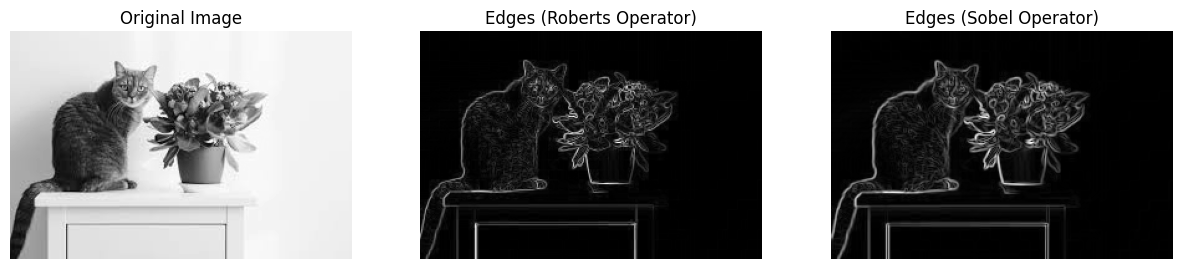

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Fungsi untuk menerapkan operator Robert
def roberts_operator(image):
    # Kernel Robert untuk deteksi tepi (sumbu x dan y)
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Menerapkan konvolusi menggunakan kernel Robert
    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)

    # Menghitung magnitudo gradien
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return magnitude

# Fungsi untuk menerapkan operator Sobel
def sobel_operator(image):
    # Kernel Sobel untuk deteksi tepi (sumbu x dan y)
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Menerapkan konvolusi menggunakan kernel Sobel
    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)

    # Menghitung magnitudo gradien
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return magnitude

# Memuat gambar menggunakan imageio
image_path = '/content/kucing.jpg'  # Ganti dengan path gambar Anda
image = imageio.imread(image_path)

# Mengkonversi gambar ke grayscale (jika gambar RGB)
if len(image.shape) == 3:
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])  # Menggunakan rumus konversi ke grayscale

# Menerapkan deteksi tepi menggunakan operator Robert dan Sobel
roberts_edges = roberts_operator(image)
sobel_edges = sobel_operator(image)

# Menampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar asli
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Menampilkan hasil deteksi tepi menggunakan operator Robert
axes[1].imshow(roberts_edges, cmap='gray')
axes[1].set_title('Edges (Roberts Operator)')
axes[1].axis('off')

# Menampilkan hasil deteksi tepi menggunakan operator Sobel
axes[2].imshow(sobel_edges, cmap='gray')
axes[2].set_title('Edges (Sobel Operator)')
axes[2].axis('off')

plt.show()


1. Import Library: Mengimpor library imageio, numpy, dan matplotlib yang dibutuhkan untuk membaca gambar, manipulasi array, dan visualisasi.
2. Definisi Fungsi roberts_operator: Fungsi ini mendefinisikan operator Robert
   untuk deteksi tepi.
* Menerima gambar sebagai input.
* Mendefinisikan kernel Robert untuk sumbu x dan y.
* Melakukan konvolusi gambar dengan kernel Robert untuk mendapatkan gradien di
  sumbu x dan y.
* Menghitung magnitudo gradien menggunakan rumus akar kuadrat dari jumlah
  kuadrat gradien x dan y.
* Mengembalikan magnitudo gradien.
3 Definisi Fungsi sobel_operator: Fungsi ini mendefinisikan operator Sobel  
  untuk deteksi tepi. Langkah-langkahnya mirip dengan fungsi roberts_operator, hanya saja menggunakan kernel Sobel.
4. Memuat dan Pra-pemrosesan Gambar:
* Memuat gambar menggunakan imageio.imread.
* Mengkonversi gambar ke grayscale jika gambar berwarna (RGB) menggunakan rumus
  konversi.
5. Deteksi Tepi:
* Menerapkan operator Robert dan Sobel pada gambar grayscale untuk mendapatkan  tepi.
6. Visualisasi:
* Menampilkan gambar asli, hasil deteksi tepi Robert, dan hasil deteksi tepi
  Sobel menggunakan matplotlib.pyplot.
Hasil yang Diharapkan:

Kode ini akan menghasilkan tiga gambar yang ditampilkan berdampingan:

1. Gambar Asli: Gambar asli yang dimuat dari path yang ditentukan.
2. Edges (Roberts Operator): Gambar hasil deteksi tepi menggunakan operator    Robert. Area tepi pada gambar akan ditandai dengan warna yang lebih terang atau lebih gelap, menunjukkan perubahan intensitas yang tajam.
3. Edges (Sobel Operator): Gambar hasil deteksi tepi menggunakan operator Sobel. Sama seperti Robert, area tepi akan ditandai dengan perubahan intensitas, tetapi Sobel biasanya menghasilkan tepi yang lebih halus dan tebal.
Kesimpulan:

Kode ini mendemonstrasikan penerapan dua metode deteksi tepi yang umum, yaitu Robert dan Sobel, pada sebuah gambar. Hasilnya adalah visualisasi tepi-tepi objek dalam gambar, yang berguna untuk berbagai aplikasi pengolahan citra seperti segmentasi, pengenalan objek, dan lainnya.